<a href="https://colab.research.google.com/github/pooja251096/Rossmann-Sales-Prediction-/blob/main/KNN_Rossman_Store_Regression_Pooja_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## Creating dataset ready to push into various Machine Learning models

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn import neighbors
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# store_data = pd.read_csv('/content/drive/MyDrive/AlmaBetter ML Regression Deliverables/Rossmann Stores Data.csv', low_memory = False)
# stores = pd.read_csv('/content/drive/MyDrive/AlmaBetter ML Regression Deliverables/store.csv')

store_data = pd.read_csv('Rossmann Stores Data.csv')
stores = pd.read_csv('store.csv')

In [5]:
store_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555.0,1.0,1.0,0,1.0
1,2,5,2015-07-31,6064,625.0,1.0,1.0,0,1.0
2,3,5,2015-07-31,8314,821.0,1.0,1.0,0,1.0
3,4,5,2015-07-31,13995,1498.0,1.0,1.0,0,1.0
4,5,5,2015-07-31,4822,559.0,1.0,1.0,0,1.0


In [6]:
# Convert the Date column to Datetime
store_data['Date']= pd.to_datetime(store_data['Date'])

# Extract Year and month from Date column
store_data['Year'] = pd.DatetimeIndex(store_data['Date']).year
store_data['Month'] = pd.DatetimeIndex(store_data['Date']).month

In [7]:
# Displaying the data
store_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,5,2015-07-31,5263,555.0,1.0,1.0,0,1.0,2015,7
1,2,5,2015-07-31,6064,625.0,1.0,1.0,0,1.0,2015,7
2,3,5,2015-07-31,8314,821.0,1.0,1.0,0,1.0,2015,7
3,4,5,2015-07-31,13995,1498.0,1.0,1.0,0,1.0,2015,7
4,5,5,2015-07-31,4822,559.0,1.0,1.0,0,1.0,2015,7


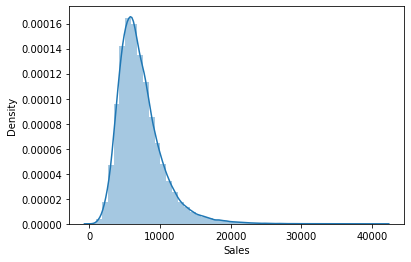

In [8]:
sns.distplot(store_data[store_data['Sales']!=0]['Sales']);

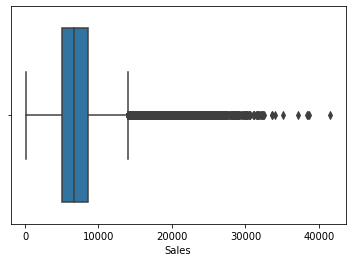

In [9]:
sns.boxplot(store_data[store_data['Sales']!=0]['Sales']);

In [10]:
store_data_high_sales=store_data[store_data['Sales']>=20000][['Year','Month','Sales']]

In [11]:
# See count of high sales/day in certain months to estimate high sales period
pd.pivot_table(data=store_data_high_sales[['Year','Month','Sales']],index='Month',columns='Year',aggfunc='count',fill_value=0)

Sales     
Year   2014 2015
Month           
1         0   75
2         0   75
3         0  124
4         0  151
5         0  132
6         0  186
7         0  123
12      257    0

In [12]:
# Check total sales monthwise
Sales_across_years_monthwise=pd.pivot_table(data=store_data[['Year','Month','Sales']],index='Month',columns='Year',aggfunc='sum',fill_value=0)


In [13]:
Sales_across_years_monthwise['diff21']=Sales_across_years_monthwise[('Sales', 2014)]-Sales_across_years_monthwise[('Sales', 2013)]
Sales_across_years_monthwise['diff32']=Sales_across_years_monthwise[('Sales', 2015)]-Sales_across_years_monthwise[('Sales', 2014)]
Sales_across_years_monthwise['diff31']=Sales_across_years_monthwise[('Sales', 2015)]-Sales_across_years_monthwise[('Sales', 2013)]

KeyError: ignored

In [14]:
Sales_across_years_monthwise

Sales           
Year        2014       2015
Month                      
1              0  198843730
2              0  178275458
3              0  205631683
4              0  197918886
5              0  189143897
6              0  207363373
7              0  212322616
12     111254415          0

In [15]:
df_date_sorted_agg=store_data.copy().sort_values(['Date']).groupby('Date')['Sales'].sum()
df_date_sorted_agg

Date
2014-12-14           0
2014-12-15    12133381
2014-12-16    10621060
2014-12-17     9483386
2014-12-18     9808212
                ...   
2015-07-27    10707292
2015-07-28     9115073
2015-07-29     8499962
2015-07-30     8798854
2015-07-31    10109742
Name: Sales, Length: 230, dtype: int64

In [16]:
stores.shape

(1115, 10)

In [17]:
stores.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [18]:
stores[(stores['Promo2']==0) & (stores['Promo2SinceWeek'].isna())].shape

(544, 10)

In [19]:
stores[stores['CompetitionOpenSinceMonth'].isna()]['Store'].nunique()

354

In [20]:
## Wherever Promo2 ie continuing and consecutive promotion is zero, implies store didn't participate,
# hence Promo2SinceWeek and Promo2SinceYear should be zero, also there won't be PromoInterval
stores.loc[(stores['Promo2']==0) & (stores['Promo2SinceWeek'].isna()),['Promo2SinceWeek']]=0
stores.loc[(stores['Promo2']==0) & (stores['Promo2SinceYear'].isna()),['Promo2SinceYear','PromoInterval']]=0

In [21]:
#Impute CompetitionDistance with max distance

stores.loc[stores['CompetitionDistance'].isna()]=stores['CompetitionDistance'].max()

In [22]:
stores.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    351
CompetitionOpenSinceYear     351
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

In [23]:
#stores[stores['Promo2SinceYear']!=0]['Promo2SinceYear'].describe()

In [24]:
## Check the CompetitionOpenSinceYear year range
stores['CompetitionOpenSinceYear'].describe()

count      764.000000
mean      2298.660995
std       4621.710349
min       1900.000000
25%       2006.000000
50%       2010.000000
75%       2013.000000
max      75860.000000
Name: CompetitionOpenSinceYear, dtype: float64

In [25]:
#stores[~stores['CompetitionOpenSinceYear'].isin([1900,1961])]['CompetitionOpenSinceYear'].min()

In [26]:
## This is the day since when we have the sales data
store_data['Date'].min()

Timestamp('2014-12-14 00:00:00')

In [27]:
stores[stores['Promo2SinceYear']!=0]['Promo2SinceYear'].min()

2009.0

In [28]:
#### calculate difference in number of days for competion and promo
## Function to change data format
def competition_open_yr_mnth(cols):
  try:
    year, month = int(cols[0]), int(cols[1])
    date = pd.to_datetime("{}-{}-01".format(year, month), format='%Y-%m')
    return date
  except:
    return '1813-01-01'  ## Dummy date to identify this data and do transformation afterwards

stores['CompetitionOpen']=stores[['CompetitionOpenSinceYear','CompetitionOpenSinceMonth']].apply(competition_open_yr_mnth,axis=1)
stores['CompetitionOpen']= stores['CompetitionOpen'].dt.strftime('%Y-%m-%d')
stores['CompetitionOpen']= pd.to_datetime(stores['CompetitionOpen'])




def promo_yr_wk(cols):
  try:
    year, week = int(cols[1]), int(cols[0])
    date = pd.to_datetime("{}{}0".format(year, week), format='%Y%W%w')
    return date
  except:
    return '1909-01-01' ## dummy date


stores['promoYearWeek'] =stores[['Promo2SinceWeek', 'Promo2SinceYear']].apply(promo_yr_wk,axis=1)
stores['promoYearWeek'] = stores['promoYearWeek'].dt.strftime('%Y%m%d')
stores['promoYearWeek']= pd.to_datetime(stores['promoYearWeek'])

In [29]:
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,promoYearWeek
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2008-09-01,1909-01-01
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2007-11-01,2010-04-04
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2006-12-01,2011-04-10
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2009-09-01,1909-01-01
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015-04-01,1909-01-01


In [30]:
#stores['CompetitionOpen'].astype(int).describe()

In [31]:
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,promoYearWeek
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2008-09-01,1909-01-01
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2007-11-01,2010-04-04
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2006-12-01,2011-04-10
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2009-09-01,1909-01-01
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015-04-01,1909-01-01


In [32]:
## Check the CompetitionOpenSinceMonth values
#stores['CompetitionOpenSinceMonth'].describe() ## 1 to 12
#stores[stores['CompetitionOpenSinceMonth']<=3]

In [33]:
#stores[stores['CompetitionOpenSinceYear']==1900]

In [34]:
## For interval, will think afterwards
#join_with = stores['PromoInterval'].str.split(',').apply(pd.Series)
#join_with.columns = join_with.columns.map(lambda x: str(x) + '_PromoInterval')

In [35]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252322 entries, 0 to 252321
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          252322 non-null  int64         
 1   DayOfWeek      252322 non-null  int64         
 2   Date           252322 non-null  datetime64[ns]
 3   Sales          252322 non-null  int64         
 4   Customers      252321 non-null  float64       
 5   Open           252321 non-null  float64       
 6   Promo          252321 non-null  float64       
 7   StateHoliday   252321 non-null  object        
 8   SchoolHoliday  252321 non-null  float64       
 9   Year           252322 non-null  int64         
 10  Month          252322 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(5), object(1)
memory usage: 21.2+ MB


In [36]:
store_data_merged=pd.merge(store_data,stores,on='Store')

In [37]:
## Calculate the number of days since when the promo started
store_data_merged['day_diff_comp']=(store_data_merged['Date']-store_data_merged['CompetitionOpen']).dt.days
store_data_merged['day_diff_promo']=(store_data_merged['Date']-store_data_merged['promoYearWeek']).dt.days

## Identifying the data based on teh dummy dates and changing them to zero
store_data_merged.loc[store_data_merged['day_diff_comp']>=73000,'day_diff_comp']=0
store_data_merged.loc[store_data_merged['day_diff_promo']>=36500,'day_diff_promo']=0

In [38]:
## Sort data in ascending order of date
store_data_merged=store_data_merged.sort_values(['Date']).reset_index()

In [39]:
store_data_merged.head()

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,promoYearWeek,day_diff_comp,day_diff_promo
0,11373,50,7,2014-12-14,0,0.0,0.0,0.0,0,0.0,2014,12,d,a,6260.0,11.0,2009.0,0,0.0,0.0,0,2009-11-01,1909-01-01,1869,0
1,6155,27,7,2014-12-14,0,0.0,0.0,0.0,0,0.0,2014,12,a,a,60.0,1.0,2005.0,1,5.0,2011.0,"Jan,Apr,Jul,Oct",2005-01-01,2011-02-06,3634,1407
2,10683,47,7,2014-12-14,0,0.0,0.0,0.0,0,0.0,2014,12,a,c,270.0,4.0,2013.0,1,14.0,2013.0,"Jan,Apr,Jul,Oct",2013-04-01,2013-04-14,622,609
3,4351,19,7,2014-12-14,0,0.0,0.0,0.0,0,0.0,2014,12,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec",1813-01-01,2011-06-05,0,1288
4,9551,42,7,2014-12-14,0,0.0,0.0,0.0,0,0.0,2014,12,a,c,290.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",1813-01-01,2011-10-09,0,1162


In [40]:
## Get index of data for last year from March to test
store_data_merged[(store_data_merged['Year']==2015) & (store_data_merged['Month']>=3)].head(2) ## 844431

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,promoYearWeek,day_diff_comp,day_diff_promo
81516,141149,626,7,2015-03-01,0,0.0,0.0,0.0,0,0.0,2015,3,c,c,10740.0,11.0,2013.0,0,0.0,0.0,0,2013-11-01,1909-01-01,485,0
81517,111541,494,7,2015-03-01,9862,1274.0,1.0,0.0,0,0.0,2015,3,b,a,1260.0,6.0,2011.0,0,0.0,0.0,0,2011-06-01,1909-01-01,1369,0


In [41]:
170136/len(store_data_merged) ## 16 % of data to test

0.6760764865767012

In [42]:
store_data_merged.columns

Index(['index', 'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open',
       'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'CompetitionOpen', 'promoYearWeek',
       'day_diff_comp', 'day_diff_promo'],
      dtype='object')

In [43]:
store_data_merged.drop(columns=['index','Date','CompetitionOpenSinceYear','CompetitionOpenSinceMonth','Promo2SinceWeek','Promo2SinceYear','PromoInterval','CompetitionOpen','promoYearWeek'],inplace=True)

In [44]:
#store_data.drop(columns='Date',inplace=True)
store_data_merged.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,StoreType,Assortment,CompetitionDistance,Promo2,day_diff_comp,day_diff_promo
0,50,7,0,0.0,0.0,0.0,0,0.0,2014,12,d,a,6260.0,0,1869,0
1,27,7,0,0.0,0.0,0.0,0,0.0,2014,12,a,a,60.0,1,3634,1407
2,47,7,0,0.0,0.0,0.0,0,0.0,2014,12,a,c,270.0,1,622,609
3,19,7,0,0.0,0.0,0.0,0,0.0,2014,12,a,c,3240.0,1,0,1288
4,42,7,0,0.0,0.0,0.0,0,0.0,2014,12,a,c,290.0,1,0,1162


In [45]:
store_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251652 entries, 0 to 251651
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                251652 non-null  int64  
 1   DayOfWeek            251652 non-null  int64  
 2   Sales                251652 non-null  int64  
 3   Customers            251651 non-null  float64
 4   Open                 251651 non-null  float64
 5   Promo                251651 non-null  float64
 6   StateHoliday         251651 non-null  object 
 7   SchoolHoliday        251651 non-null  float64
 8   Year                 251652 non-null  int64  
 9   Month                251652 non-null  int64  
 10  StoreType            251652 non-null  object 
 11  Assortment           251652 non-null  object 
 12  CompetitionDistance  251652 non-null  float64
 13  Promo2               251652 non-null  int64  
 14  day_diff_comp        251652 non-null  int64  
 15  day_diff_promo   

In [46]:
store_data_merged =store_data_merged[~store_data_merged.isin([np.nan, np.inf, -np.inf]).any(1)]

In [47]:
store_data_merged.fillna(0)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,StoreType,Assortment,CompetitionDistance,Promo2,day_diff_comp,day_diff_promo
0,50,7,0,0.0,0.0,0.0,0,0.0,2014,12,d,a,6260.0,0,1869,0
1,27,7,0,0.0,0.0,0.0,0,0.0,2014,12,a,a,60.0,1,3634,1407
2,47,7,0,0.0,0.0,0.0,0,0.0,2014,12,a,c,270.0,1,622,609
3,19,7,0,0.0,0.0,0.0,0,0.0,2014,12,a,c,3240.0,1,0,1288
4,42,7,0,0.0,0.0,0.0,0,0.0,2014,12,a,c,290.0,1,0,1162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251647,619,5,7384,614.0,1.0,1.0,0,0.0,2015,7,a,a,1600.0,1,3347,2084
251648,620,5,12074,937.0,1.0,1.0,0,0.0,2015,7,d,c,5440.0,1,0,292
251649,621,5,7296,870.0,1.0,1.0,0,1.0,2015,7,a,a,30.0,0,4778,0
251650,612,5,8161,493.0,1.0,1.0,0,0.0,2015,7,d,c,2490.0,1,1002,2182


In [48]:
## Convert datatype of CompetitionDistance from 
store_data_merged['CompetitionDistance']=store_data_merged['CompetitionDistance'].astype(int)

In [49]:
## Encoding Assortment with numerical values
store_data_merged['Assortment']=store_data_merged['Assortment'].apply(lambda x: 1 if x=='a' else (2 if x=='b' else 3))

In [50]:

## Create Dummy variables for object type data
store_data_final=pd.get_dummies(store_data_merged,drop_first=True)

In [51]:
## Check presence of null in data
store_data_final.isna().sum().sum()


0

In [52]:
## Converting Day of Week to object type
store_data_merged['DayOfWeek']=store_data_merged['DayOfWeek'].astype(object)

Since the Day of Week is in number, a regression model will fit coefficients based on number. So instead of that it can be converted to object type so as to get categories out of it. Our model can then predict based on the categories.

In [53]:
dataset = pd.get_dummies(store_data_merged,drop_first=True)

In [54]:
dataset.columns

Index(['Store', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'Year',
       'Month', 'Assortment', 'CompetitionDistance', 'Promo2', 'day_diff_comp',
       'day_diff_promo', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'StoreType_b', 'StoreType_c',
       'StoreType_d'],
      dtype='object')

In [55]:
#re-ordering dataset, keeping target value at the end of independent variables
dataset = dataset[['Store', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'Year',
       'Month', 'Assortment', 'CompetitionDistance', 'Promo2', 'day_diff_comp',
       'day_diff_promo', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Sales']]

In [56]:
dataset.head()

,Store,Customers,Open,Promo,SchoolHoliday,Year,Month,Assortment,CompetitionDistance,Promo2,day_diff_comp,day_diff_promo,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Sales
0,50,0.0,0.0,0.0,0.0,2014,12,1,6260,0,1869,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,27,0.0,0.0,0.0,0.0,2014,12,1,60,1,3634,1407,0,0,0,0,0,1,0,0,0,0,0,0,0
2,47,0.0,0.0,0.0,0.0,2014,12,3,270,1,622,609,0,0,0,0,0,1,0,0,0,0,0,0,0
3,19,0.0,0.0,0.0,0.0,2014,12,3,3240,1,0,1288,0,0,0,0,0,1,0,0,0,0,0,0,0
4,42,0.0,0.0,0.0,0.0,2014,12,3,290,1,0,1162,0,0,0,0,0,1,0,0,0,0,0,0,0


# EDA

In [57]:
dataset.corr()

,Store,Customers,Open,Promo,SchoolHoliday,Year,Month,Assortment,CompetitionDistance,Promo2,day_diff_comp,day_diff_promo,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Sales
Store,1.000000,0.022548,0.000902,0.000128,0.003316,-0.001003,0.000710,0.004014,-0.026894,0.006487,0.001844,-0.012852,0.000176,0.000176,0.000081,0.000081,0.000085,-0.000783,0.000425,-0.000025,0.000748,0.001440,0.061109,-0.051007,0.003121
Customers,0.022548,1.000000,0.625906,0.310944,0.068393,-0.042959,0.040879,0.023567,-0.098915,-0.152307,-0.009918,-0.135109,0.132211,0.090930,0.041090,0.067048,0.027873,-0.517551,-0.188154,-0.120666,-0.111967,0.388695,0.034324,-0.177050,0.890557
Open,0.000902,0.625906,1.000000,0.300507,0.051278,0.039410,-0.025268,0.002825,0.007592,-0.008094,-0.002149,-0.006442,0.178414,0.187397,0.075664,0.095856,0.184871,-0.851638,-0.310788,-0.199848,-0.183672,0.057519,-0.004396,-0.005688,0.689753
Promo,0.000128,0.310944,0.300507,1.000000,0.055101,0.053620,-0.053098,-0.000510,-0.000243,0.001766,-0.000057,0.000325,0.129485,0.129485,0.127587,0.127587,-0.325398,-0.325645,0.001256,0.020456,-0.069712,-0.000177,-0.000398,0.000736,0.447373
SchoolHoliday,0.003316,0.068393,0.051278,0.055101,1.000000,-0.217887,0.241225,-0.002787,-0.003927,-0.015027,0.000640,-0.009637,0.074189,0.052684,0.067408,0.077567,-0.170045,-0.170191,0.030432,0.189259,0.190592,-0.000956,0.000760,-0.013402,0.091118
Year,-0.001003,-0.042959,0.039410,0.053620,-0.217887,1.000000,-0.707454,-0.009717,-0.004670,0.032979,0.013198,0.037540,-0.023900,-0.023900,0.020021,0.020021,0.016974,0.014938,0.038771,0.024528,-0.332735,-0.003580,-0.007500,0.013716,-0.067303
Month,0.000710,0.040879,-0.025268,-0.053098,0.241225,-0.707454,1.000000,0.006874,0.003304,-0.023331,0.004068,0.003657,0.018899,0.028077,-0.016843,-0.012263,-0.023913,-0.013192,-0.021396,-0.018002,0.235395,0.002533,0.005306,-0.009703,0.067948
Assortment,0.004014,0.023567,0.002825,-0.000510,-0.002787,-0.009717,0.006874,1.000000,0.145491,0.003934,-0.104471,-0.014110,0.000241,0.000241,-0.000188,-0.000188,-0.000159,-0.000191,-0.002196,-0.000238,0.003258,-0.035997,0.011737,0.231539,0.098033
CompetitionDistance,-0.026894,-0.098915,0.007592,-0.000243,-0.003927,-0.004670,0.003304,0.145491,1.000000,-0.143557,-0.017886,-0.077463,0.000117,0.000117,-0.000090,-0.000090,-0.000075,-0.000099,-0.001746,-0.000115,0.001570,-0.070864,-0.096912,0.132162,-0.014258
Promo2,0.006487,-0.152307,-0.008094,0.001766,-0.015027,0.032979,-0.023331,0.003934,-0.143557,1.000000,0.008439,0.793882,-0.000790,-0.000790,0.000659,0.000659,0.000558,0.000504,0.009606,0.000809,-0.010979,-0.054361,-0.003611,0.092375,-0.087088


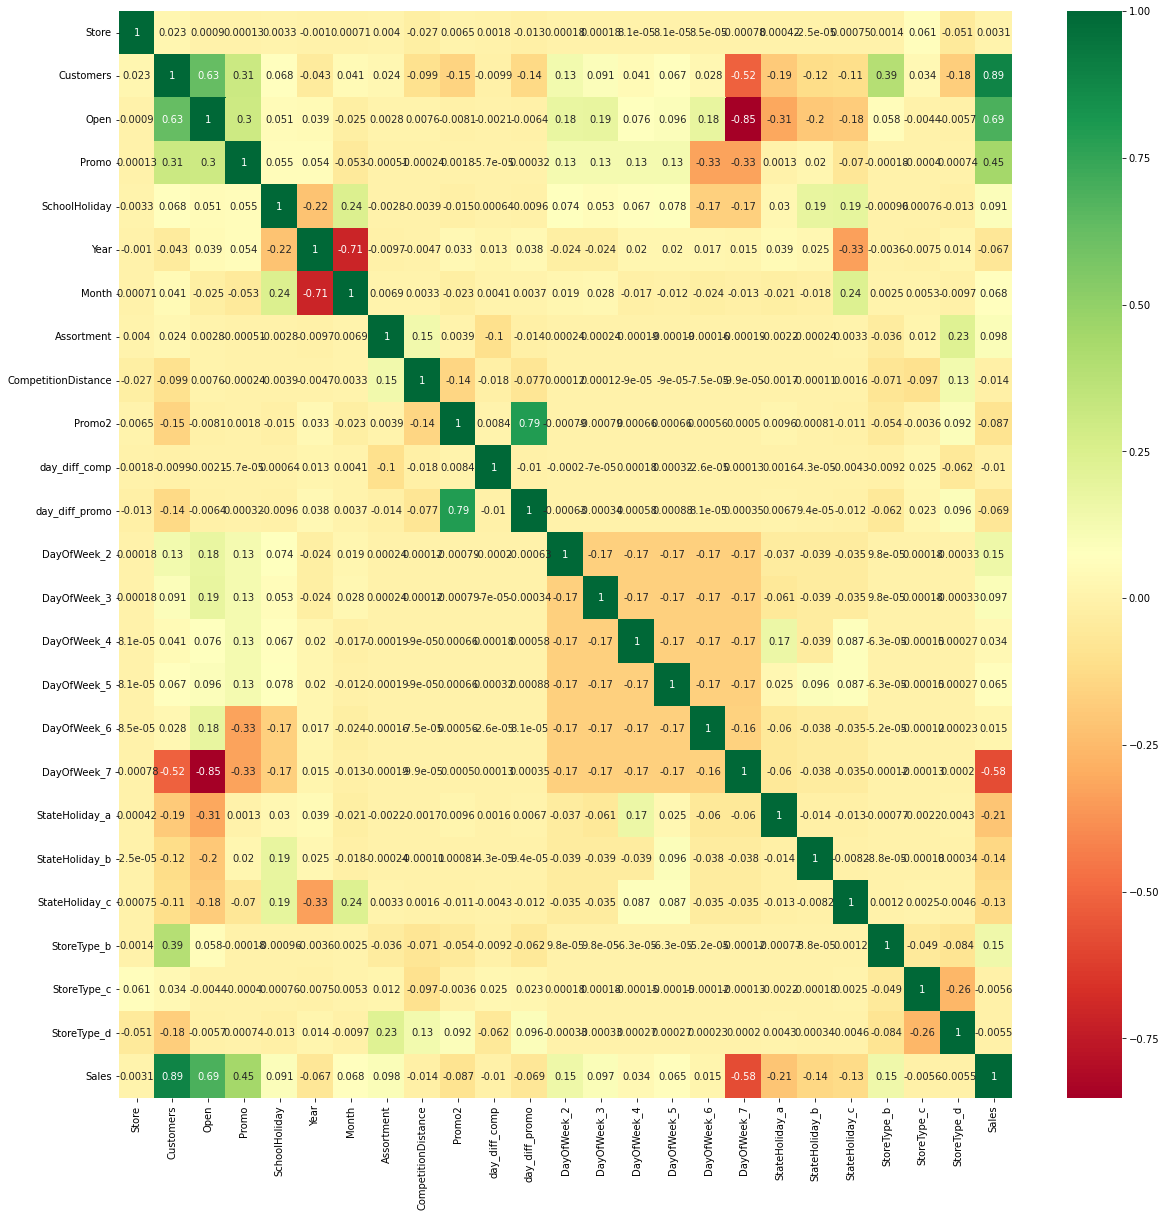

In [58]:
corrmat = dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**from above correlation matrix we can see that there is no high correlation between independent variable**

**Sales vs SchoolHoliday**

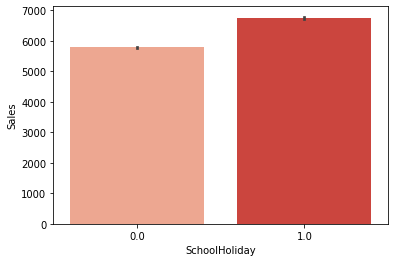

In [59]:
sales_on_schoolholiday = sns.barplot(x='SchoolHoliday', y='Sales', data= dataset, palette='Reds')
sales_on_schoolholiday 

Sales on School Holiday are just slightly higher than that of non-School Holiday. 

**Assortment vs Sales**

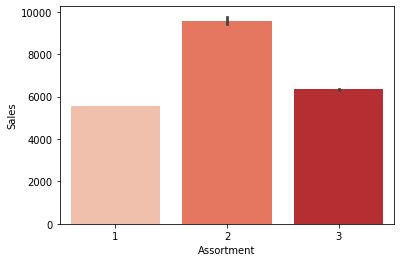

In [60]:
assortment_sales = sns.barplot(x='Assortment', y='Sales', data= dataset, palette='Reds')
assortment_sales

We can see that assortment 2 has the best sales among three assortments. 

**Sales by Year**

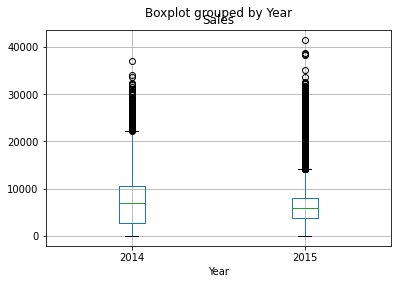

In [61]:
#sales_per_year = sns.barplot(x='Year', y='Sales', data= dataset, palette='Reds')
#sales_per_year
dataset.boxplot(column='Sales', by='Year')
plt.show()

From above boxplot we can say that average sales of year 2015 is higher than other years.

**Sales by Month**

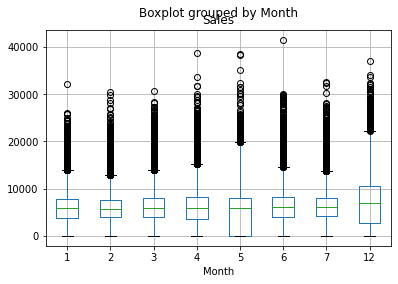

In [62]:
#sales_per_year = sns.barplot(x='Month', y='Sales', data= dataset, palette='Reds')
#sales_per_year
dataset.boxplot(column='Sales', by='Month')
plt.show()

Average sales of month 12 or december is comparatively higher than other months

## Splitting the dataset into the Training set and Test set

In [63]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=False )

In [65]:
print(X_train)

[[5.000e+01 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [2.700e+01 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [4.700e+01 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [2.920e+02 9.060e+02 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.500e+01 1.680e+03 1.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [1.450e+02 1.297e+03 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]


In [66]:
print(y_train)

[    0     0     0 ...  7817 12278  9711]


In [67]:
print(X_test)

[[3.930e+02 6.480e+02 1.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [7.870e+02 1.226e+03 1.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [4.800e+02 7.400e+02 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [6.210e+02 8.700e+02 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [6.120e+02 4.930e+02 1.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [1.000e+00 5.550e+02 1.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]]


In [68]:
print(y_test)

[ 7514 12227  6405 ...  7296  8161  5263]


##KNN Model

## Feature Scaling

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [70]:
print(X_train_scaled)

[[-1.57691811 -1.33652476 -2.09363787 ... -0.12513866 -0.39322925
   1.49514533]
 [-1.64831411 -1.33652476 -2.09363787 ... -0.12513866 -0.39322925
  -0.6688313 ]
 [-1.58623064 -1.33652476 -2.09363787 ... -0.12513866 -0.39322925
  -0.6688313 ]
 ...
 [-0.82570805  0.5949888   0.47763752 ... -0.12513866 -0.39322925
  -0.6688313 ]
 [-1.65452246  2.24508979  0.47763752 ... -0.12513866  2.54304583
  -0.6688313 ]
 [-1.2820216   1.42856695  0.47763752 ... -0.12513866 -0.39322925
  -0.6688313 ]]


In [71]:
print(X_test_scaled)

[[-0.51218649  0.04495514  0.47763752 ... -0.12513866 -0.39322925
   1.49514533]
 [ 0.710858    1.2772011   0.47763752 ... -0.12513866  2.54304583
  -0.6688313 ]
 [-0.24212337  0.24109118  0.47763752 ... -0.12513866 -0.39322925
  -0.6688313 ]
 ...
 [ 0.19556514  0.51823992  0.47763752 ... -0.12513866 -0.39322925
  -0.6688313 ]
 [ 0.16762758 -0.28549144  0.47763752 ... -0.12513866 -0.39322925
   1.49514533]
 [-1.72902263 -0.15331281  0.47763752 ... -0.12513866  2.54304583
  -0.6688313 ]]


## Training the K-NN model on the Training set and Predicting the Test set results

In [72]:
#to store rmse values for different k
rmse_val = [] 
for K in range(5):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=-1)
    #fit the model
    model.fit(X_train_scaled, y_train)
    #make prediction on test set  
    pred=model.predict(X_test_scaled) 
    #calculate rmse
    error = sqrt(mean_squared_error(y_test,pred)) 
    #store rmse values
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1386.3516645325174
RMSE value for k=  2 is: 1249.7664917060713
RMSE value for k=  3 is: 1219.178983570803
RMSE value for k=  4 is: 1219.3820709412591
RMSE value for k=  5 is: 1233.4901580124472


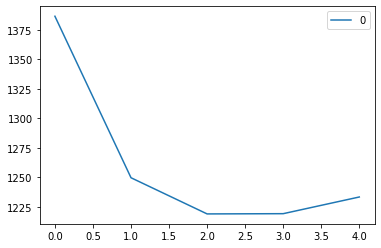

In [73]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [74]:
#For deciding the value of k, plotting the elbow curve every time is be a tedious process. we can simply use gridsearch to find the best value.

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 6}

## Evaluating the Model Performance

**Checking R2 Score**

In [76]:
#R2 Score
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.8879443004253998

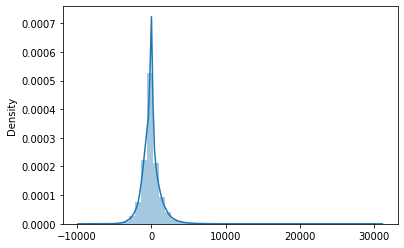

In [77]:

sns.distplot(y_test-pred)

from below plot we can  see the difference between actual and predicted value. since it is minimal so we are getting closed minimal gaussian distribution graph. 

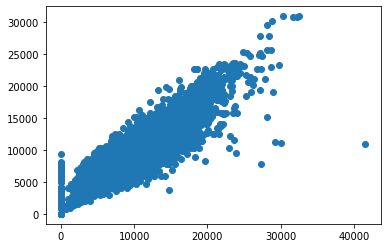

In [78]:
plt.scatter(y_test,pred)

From above plot we can see that the values of actual and prediction are almost  align in a line itself. so that's why we can say this model is good.